## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [3]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Check for missing data and remove all rows containing missing data

In [5]:
# answer below:
cancer.dropna()


,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Adjust the target variable so that it has values of either 0 or 1

In [9]:
# answer below:
cancer['survival'] = cancer['survival'].replace(to_replace=2, value=0)


Split the data into train and test (20% in test)

In [11]:
# answer below:
from sklearn.model_selection import train_test_split
X = cancer.drop('survival', axis=1)
y = cancer['survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [18]:
# answer below:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
gbc.fit(X_train, y_train)
train_predict = gbc.predict(X_train)
test_predict = gbc.predict(X_test)
print(accuracy_score(y_train, train_predict))
print(accuracy_score(y_test, test_predict))


0.860655737704918
0.7580645161290323


Print the confusion matrix for the test data. What do you notice about our predictions?

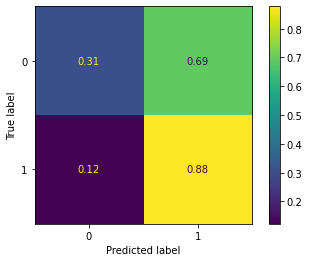

[[ 4  9]
 [ 6 43]]


In [24]:
# answer below:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc, X_test, y_test, normalize='true')
plt.show()
print(confusion_matrix(y_test, test_predict))


Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

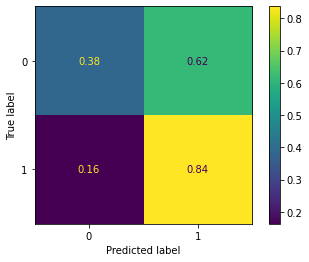

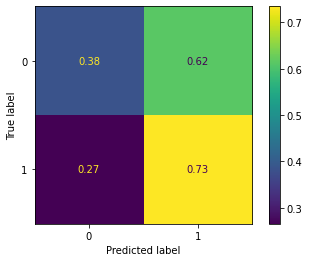

In [27]:
# answer below:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(learning_rate=1, max_depth=5)
gbc.fit(X_train, y_train)
train_predict = gbc.predict(X_train)
test_predict = gbc.predict(X_test)
plot_confusion_matrix(gbc, X_test, y_test, normalize='true')
plt.show()

gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=5)
gbc.fit(X_train, y_train)
train_predict = gbc.predict(X_train)
test_predict = gbc.predict(X_test)
plot_confusion_matrix(gbc, X_test, y_test, normalize='true')
plt.show()


Perform a grid search for the optimal learning rate. Instead of accuracy, use a metric that will help your model predict the positive class.

In [30]:
# answer below:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [.001, .01, .1, .25, .5, .75]}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, verbose=1, scoring='recall')
grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.8s finished


nan

List the feature importances for the model with the optimal learning rate.

In [46]:
pd.DataFrame({'features': X.columns, 'importance scores': grid.best_estimator_.feature_importances_}).sort_values(by='importance scores', ascending=False)

,features,importance scores
2,nodes,0.571906
0,age,0.357525
1,op_year,0.070569
